In [2]:
import csv
import os

import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx

data_dir = '../data/'
trace_data = os.path.join(data_dir, 'training_data', '2020_05_04', 'trace')

In [3]:
trace_csvs = os.listdir(trace_data)
df = pd.read_csv(trace_data + os.sep + trace_csvs[0])

df.tail()

,callType,startTime,elapsedTime,success,traceId,id,pid,cmdb_id,serviceName
3650200,CSF,1588607984997,24.0,True,78df6171e06a222f3102,619ac171e06a25659629,a75f0171e06a22409460,docker_002,csf_005
3650201,CSF,1588607985000,194.0,True,15bbe171e06a23613238,b3597171e06a25679633,00d9f171e06a23709492,docker_002,csf_004
3650202,CSF,1588607985039,23.0,True,dc892171e06a24a02218,9ff37171e06a258f2061,41a90171e06a24c81947,docker_003,csf_004
3650203,CSF,1588607985064,19.0,True,dc892171e06a24a02218,07004171e06a25a82063,41a90171e06a24c81947,docker_003,csf_005
3650204,CSF,1588607985203,25.0,True,15bbe171e06a23613238,1c2ef171e06a26319773,00d9f171e06a23709492,docker_002,csf_005


In [32]:
# Little test
# pid = '41a90171e06a24c81947'
# df[df['id'] == pid]

# firstTime = df.iloc[0]['startTime']
# maxTime = firstTime + 0.5*1000 # 10 min

traces = df['traceId'].unique()
trace_df = df[df['traceId'] == traces[1]]

# df_reduced = df[df['startTime'] < maxTime]
# df_reduced.describe()

In [33]:
G = nx.Graph()
G = nx.from_pandas_edgelist(trace_df, source='pid', target='id', )

In [34]:
print(len(list(G.nodes)))
print(len(list(G.edges)))

7
5


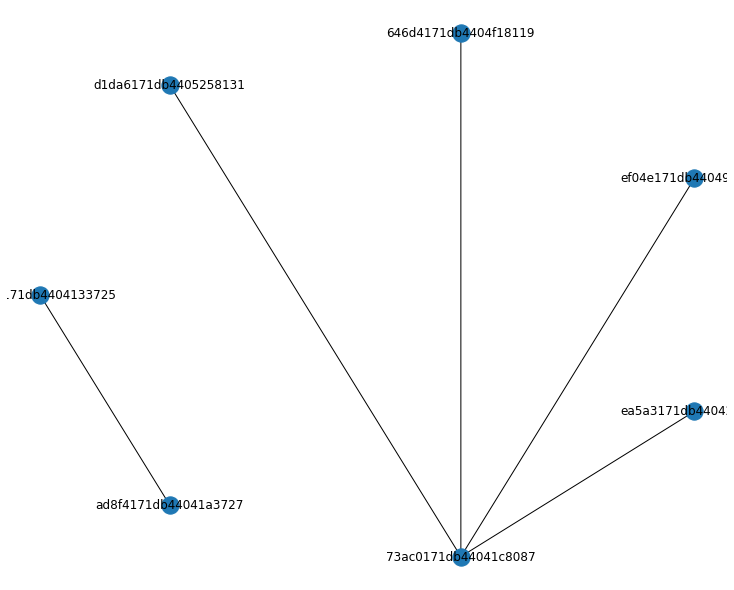

In [36]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)